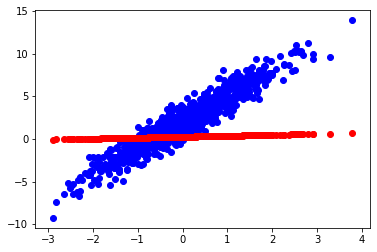

Loss : 
12.655065
 0: W=-0.97 b=1.34, Loss=17.23811
 1: W=-0.18 b=1.50, Loss=11.35433
 2: W=0.46 b=1.62, Loss=7.60173
 3: W=0.96 b=1.71, Loss=5.20777
 4: W=1.37 b=1.78, Loss=3.68017
 5: W=1.70 b=1.84, Loss=2.70515
 6: W=1.95 b=1.88, Loss=2.08266
 7: W=2.16 b=1.91, Loss=1.68514
 8: W=2.33 b=1.94, Loss=1.43122
 9: W=2.46 b=1.95, Loss=1.26898
10: W=2.57 b=1.97, Loss=1.16529
11: W=2.65 b=1.98, Loss=1.09900
12: W=2.72 b=1.99, Loss=1.05662
13: W=2.78 b=1.99, Loss=1.02951
14: W=2.82 b=2.00, Loss=1.01216
15: W=2.86 b=2.00, Loss=1.00106
16: W=2.88 b=2.00, Loss=0.99396
17: W=2.91 b=2.00, Loss=0.98941
18: W=2.92 b=2.00, Loss=0.98649
19: W=2.94 b=2.00, Loss=0.98463
20: W=2.95 b=2.00, Loss=0.98343
21: W=2.96 b=2.01, Loss=0.98266
22: W=2.97 b=2.01, Loss=0.98217
23: W=2.97 b=2.01, Loss=0.98186
24: W=2.98 b=2.01, Loss=0.98165
25: W=2.98 b=2.01, Loss=0.98152
26: W=2.98 b=2.01, Loss=0.98144
27: W=2.99 b=2.01, Loss=0.98139
28: W=2.99 b=2.01, Loss=0.98135
29: W=2.99 b=2.01, Loss=0.98133


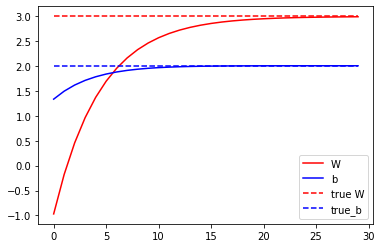

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Model(object):
  def __init__(self):
    # W, b is random num
    self.W = tf.Variable(tf.random.normal([1]))
    self.b = tf.Variable(tf.random.normal([1]))

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

#assert model(3.0).numpy() == 15.0

def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

# Graph - Current data
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Loss : '),
print(loss(model(inputs), outputs).numpy())

# Gradient Descent - We can use Optimize but just use train function
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

model = Model()

# Save change of W and b
Ws, bs = [], []

# ephochs = loop num
epochs = range(30)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('%2d: W=%1.2f b=%1.2f, Loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Make Graph
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()